In [41]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

# Decision Tree Classifier

In [3]:
np.random.seed(0)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
tree = DecisionTreeClassifier()

In [6]:
X,y = datasets.load_iris().data, datasets.load_iris().target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,y_pred)

1.0

In [13]:
import pydotplus

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

In [16]:
dot_data = sklearn.tree.export_graphviz(tree,
                                       out_file=None,
                                       feature_names=iris.feature_names,
                                       class_names=iris.target_names)

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data)

# RandomForest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rnd_frst = RandomForestClassifier()

In [20]:
model = rnd_frst.fit(X_train,y_train)

In [21]:
accuracy_score(model.predict(X_test),y_test)

0.9666666666666667

In [22]:
model2 = RandomForestClassifier(criterion='entropy').fit(X_train,y_train)

In [23]:
accuracy_score(model2.predict(X_test),y_test)

1.0

# Finding feature importance and retraining model on only important features

In [40]:
model2.feature_importances_

array([0.0792063, 0.0196364, 0.451472 , 0.4496853])

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

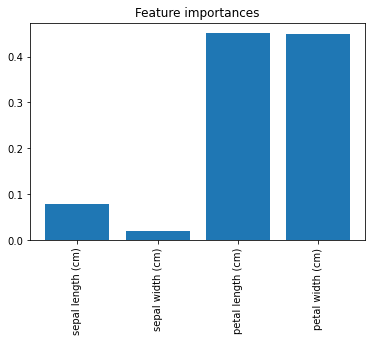

In [45]:
plt.figure()
plt.title('Feature importances')
plt.bar(range(model2.feature_importances_.shape[0]), model2.feature_importances_)
plt.xticks(range(model2.feature_importances_.shape[0]), iris.feature_names, rotation='90')
plt.show()

## Selecting features with feature importance above some threshold and retrain the model

In [46]:
from sklearn.feature_selection import SelectFromModel

In [48]:
rndm_frst = RandomForestClassifier()

In [51]:
selector = SelectFromModel(rndm_frst, threshold=0.3)

In [52]:
important_features = selector.fit_transform(X_train,y_train)

In [54]:
model3 = rndm_frst.fit(important_features,y_train)

In [57]:
accuracy_score(model3.predict(selector.transform(X_test)),y_test)

1.0

# Handling Imbalanced dataset

## set the hyperparameter class_weight = 'balanced'

In [62]:
X = X[40:]
y = y[40:]

In [63]:
y = np.where((y==0),0,1)

In [94]:
model4 = RandomForestClassifier(class_weight='balanced')

In [95]:
model4 = model4.fit(X,y)

In [67]:
accuracy_score(model.predict(X),y)

0.5545454545454546

# Controlling Tree Size

In [98]:
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

In [99]:
model5 = decisiontree.fit(X,y)

# Improving performance using Adaboost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
adb = AdaBoostClassifier()

In [103]:
adb = adb.fit(X,y)

# Out of bag score for RandomForest

In [104]:
rnd_frst = RandomForestClassifier(oob_score=True,n_estimators=1000,n_jobs=-1)

In [105]:
rnd_frst.fit(X,y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)

In [108]:
rnd_frst.oob_score_

1.0